In [1]:
import sys

sys.path.append('../')

# Atividade 1 - Tranformações Lineares e Determinante

Esse notebook demonstra a aplicação das matrizes de transformação criadas na atividade anterior — Rotação Horária a 90º seguida de
Cisalhamento Horizontal. Além disso, pode ser visualizado a "área" do valor do Determinante após as transformações lineares. Por fim, iremos aplicar o Produto Dot, que é uma operação algébrica entre 2 vetores que retorna um escalar.

Primeiro importamos a função `plot_vectors` para criar as visualizações gráfica e `numpy` para realizar os cálculos

In [2]:
import numpy as np

from src.utils.plot_vectors import plot_vectors

## Aplicação das Transformações Lineares

Temos os vetores unitários:
$$\vec i = \begin{pmatrix}1 \\ 0
            
            \end{pmatrix}$$
$$\vec j = \begin{pmatrix}0 \\ 1
            
            \end{pmatrix}$$

Também temos as matrizes de rotação e shear horizontal:

$$

M_{rota\c{c}ão} = \begin{bmatrix}0 & 1 \\
            
            -1 & 0\end{bmatrix}
            
$$

$$

M_{shear} = \begin{bmatrix}1 & 2 \\
            
            0 & 1\end{bmatrix}     

$$

Aplicando as trannsformações lineares, obtemos:

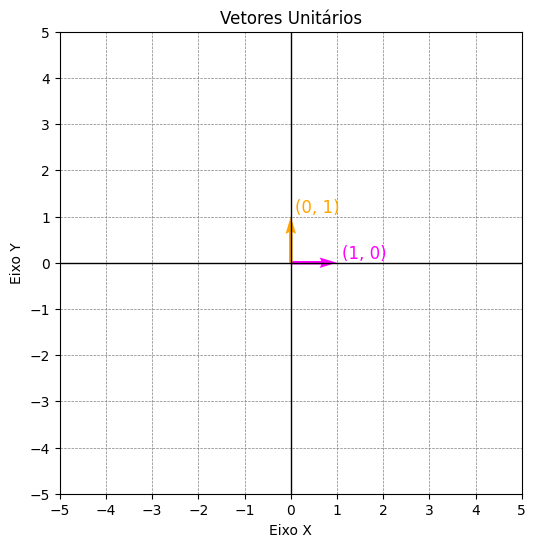

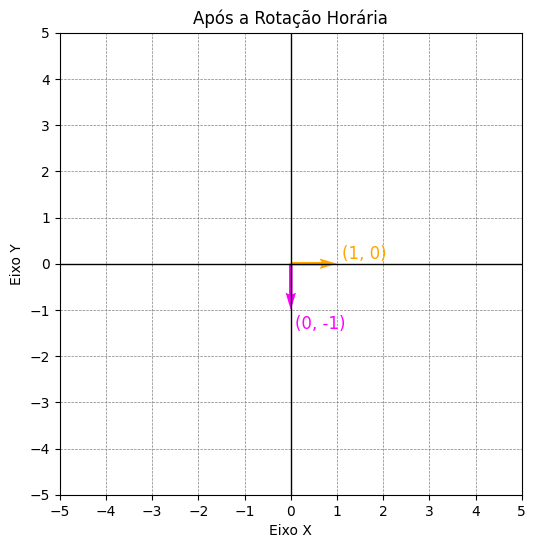

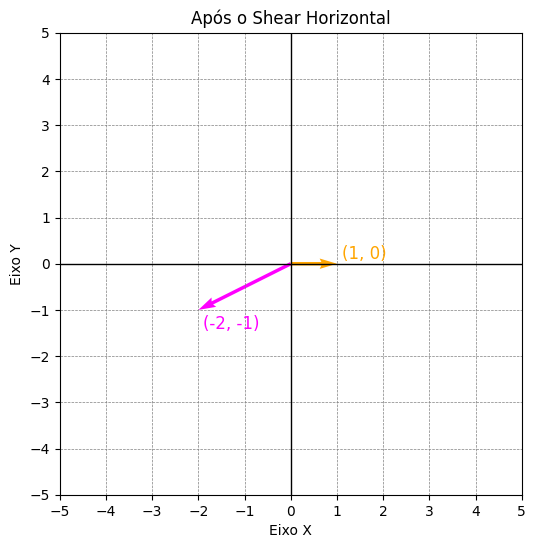

In [3]:
unit_vectors = np.array([[1, 0], [0, 1]])


rotation_matrix = np.array([[0, 1], [-1, 0]])
rotationed_vectors = np.array([rotation_matrix @ vector for vector in unit_vectors])

def get_shear_matrix(k: float) -> np.ndarray:
    return np.array([[1, k], [0, 1]])
k = 2
shear_matrix = get_shear_matrix(k)
sheared_vectors = np.array([shear_matrix @ vector for vector in rotationed_vectors])

plot_vectors('Vetores Unitários', unit_vectors)
plot_vectors('Após a Rotação Horária', rotationed_vectors)
plot_vectors('Após o Shear Horizontal', sheared_vectors)

## Determinante
O determinante representa a taxa de variação da área, ou volume, após uma transformação linear. Ele indica a orientação da transformação: 
1. Um determinante positivo preserva a orientação, enquanto um negativo a inverte.
2. Se o determinante for um, a tranformação preserva o volume, ou área, e a orientação original. 
3. Se o determinante for zero, a transformação colapsa o espaço para uma dimensão inferior.


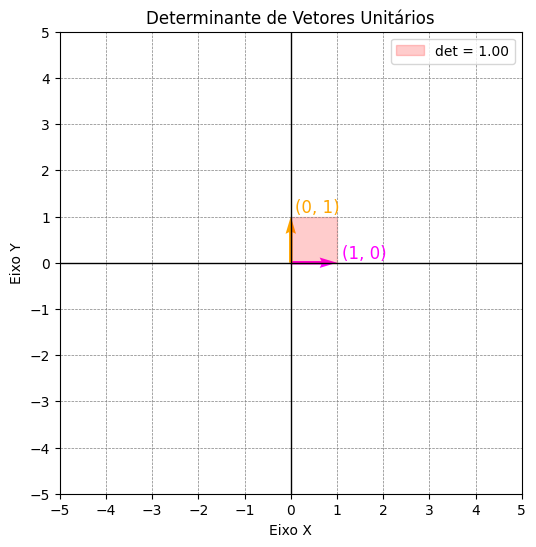

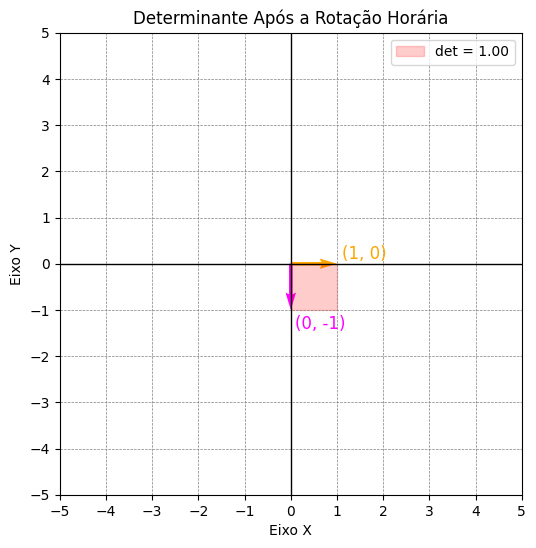

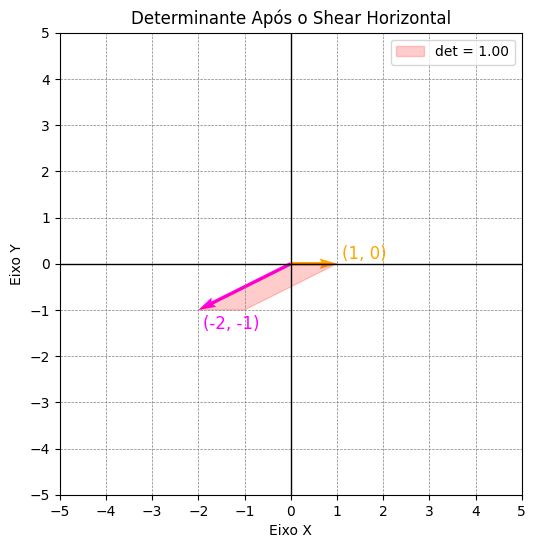

In [4]:
plot_vectors('Determinante de Vetores Unitários', unit_vectors, True)
plot_vectors('Determinante Após a Rotação Horária', rotationed_vectors, True)
plot_vectors('Determinante Após o Shear Horizontal', sheared_vectors, True)

Note que o determinante de cada transformação continua sendo um, correspondendo ao item 2.

## Composição de Matrizes

Sabemos que a o produto entre matrizes 2x2 se dá por:

$$
    A = \begin{bmatrix}a & b \\
            
            c & d\end{bmatrix}
$$

$$
    B = \begin{bmatrix}e & f \\
            
            g & h\end{bmatrix}
$$

$$ AB = \begin{bmatrix}ae + bg & af + bh \\
            
            ce + dg & cf + dh\end{bmatrix}

$$

Como a ordem da composição é da direita para a esquerda, B é a primeira transformação aplicada e A, a segunda.

In [5]:
def matrix_composition(mA: np.array, mB: np.array):
    rows_A, cols_A = mA.shape
    rows_B, cols_B = mB.shape
    
    if cols_A != rows_B:
        return "Error: Incompatible dimensions for multiplication."

    mC = np.zeros((rows_A, cols_B), dtype=int)
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                mC[i, j] += mA[i, k] * mB[k, j]
                
    return mC

### Rotação Horária de 90º + Cisalhamento Horizontal

$$
S_xR = 
        \begin{bmatrix}1 & 2 \\
            
            0 & 1\end{bmatrix}
        \begin{bmatrix}0 & 1 \\
            
            -1 & 0\end{bmatrix} =
        \begin{bmatrix}1 \cdot 0 + 2 \cdot (-1) & 1 \cdot 1 + 2 \cdot 0 \\
            
            0 \cdot 0 + 1 \cdot (-1) & 0 \cdot 1 + 1 \cdot 0\end{bmatrix} =
        \begin{bmatrix}-2 & 1 \\
            
            -1 & 0\end{bmatrix}

$$

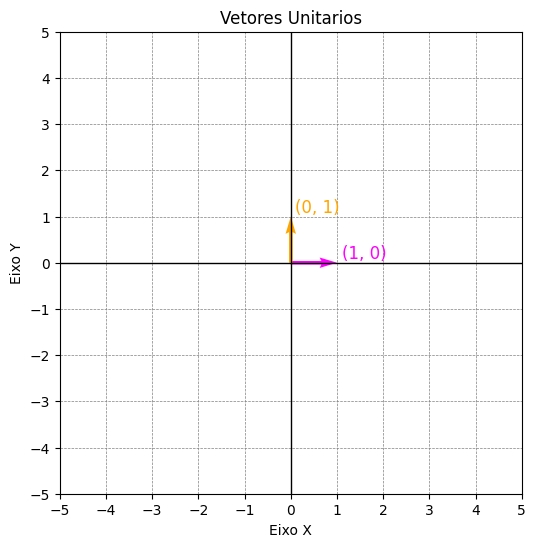

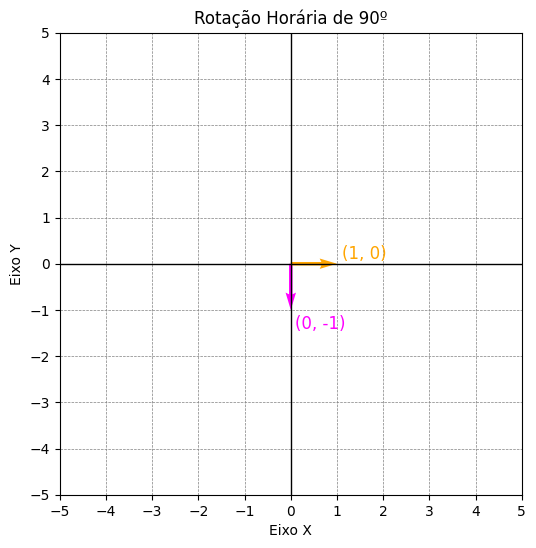

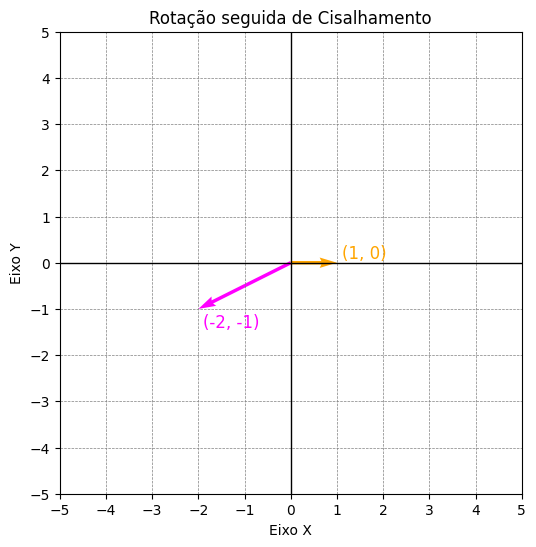

In [ ]:
rotationed_vectors_composition= matrix_composition(rotation_matrix, unit_vectors)
rotationed_sheared_vectors = matrix_composition(shear_matrix, rotationed_vectors_composition)

plot_vectors('Vetores Unitarios', unit_vectors)
plot_vectors('Rotação Horária de 90º', rotationed_vectors_composition.T)
plot_vectors('Rotação seguida de Cisalhamento', rotationed_sheared_vectors.T)

### Cisalhamento Horizontal + Rotação Horária de 90º

$$
S_xR =  \begin{bmatrix}0 & 1 \\   

            -1 & 0\end{bmatrix}
        \begin{bmatrix}1 & 2 \\

            0 & 1\end{bmatrix} =
        \begin{bmatrix}
            0 \cdot 1 + 1 \cdot 0 & 
            0 \cdot 2 + 1 \cdot 1 \\
            
            (-1) \cdot 1 + 0 \cdot 0 & 
            (-1) \cdot 2 + 0 \cdot 1
        \end{bmatrix} =
        \begin{bmatrix}0 & 1 \\
            
            -1 & -2\end{bmatrix}

$$

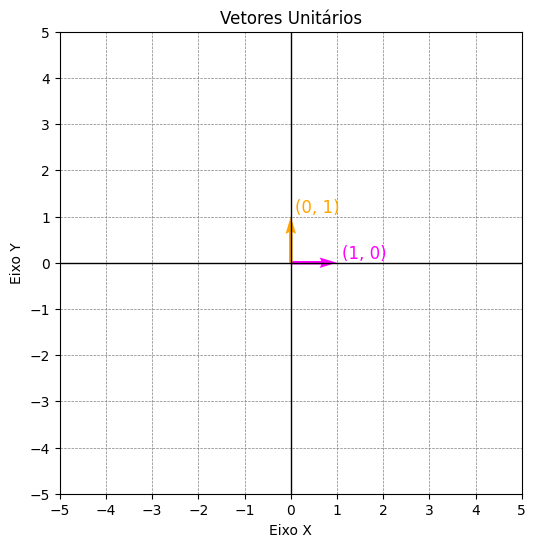

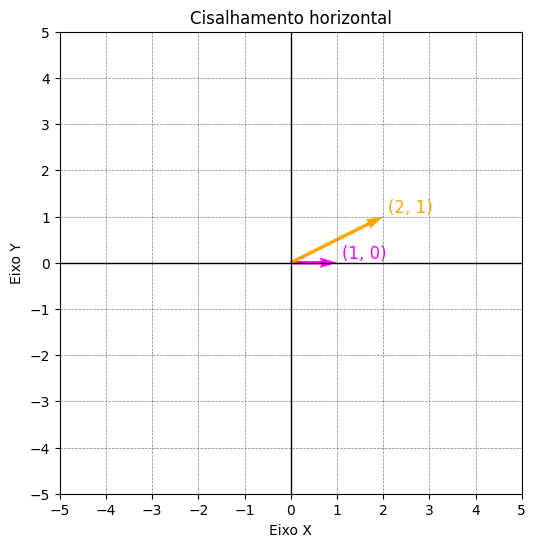

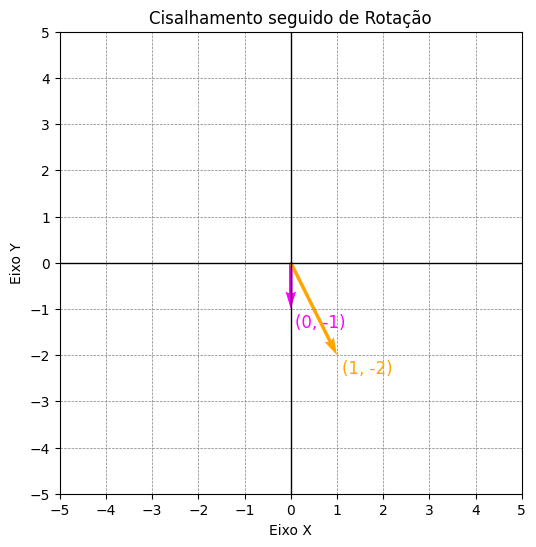

In [13]:
sheared_vectors_composition = matrix_composition(shear_matrix, unit_vectors)
sheared_rotationed_vectors = matrix_composition(rotation_matrix, sheared_vectors_composition)

plot_vectors('Vetores Unitários', unit_vectors)
plot_vectors('Cisalhamento horizontal', sheared_vectors_composition.T)
plot_vectors('Cisalhamento seguido de Rotação', sheared_rotationed_vectors.T)

## Produto Escalar entre Dois Vetores (Dot Product)

Iremos aplicar uma transformação linear de rotação a um vetor $\vec x$ para obter o vetor $\vec y$ perpendicular à $\vec x$.

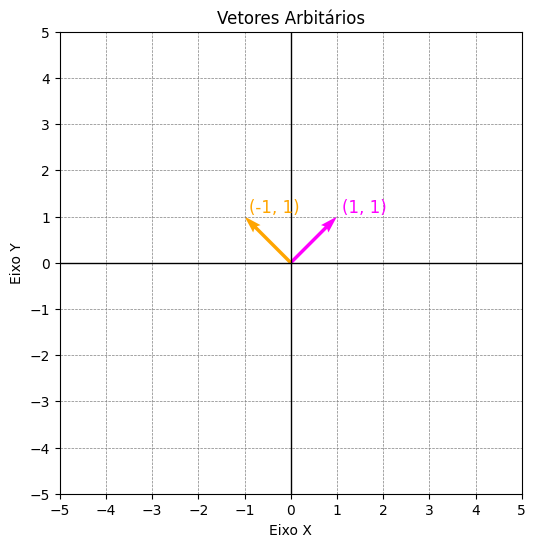

In [15]:
vector = np.array([1, 1])
perpendicular_vector = vector @ rotation_matrix
vectors = np.array([vector, perpendicular_vector])

plot_vectors('Vetores Arbitários', vectors)

In [17]:
print(f"Produto escalar = {np.dot(vector, perpendicular_vector)}")

Produto escalar = 0


Como os vetores são perpendicular entre si, seu produto escalar sempre será 0. Ou seja, não há semelhança entre eles

## Análise de Código

In [21]:
v1 = np.array([1, 2])
v2 = np.array([4, 5])

dot = np.dot(v1, v2)
print(dot)

14


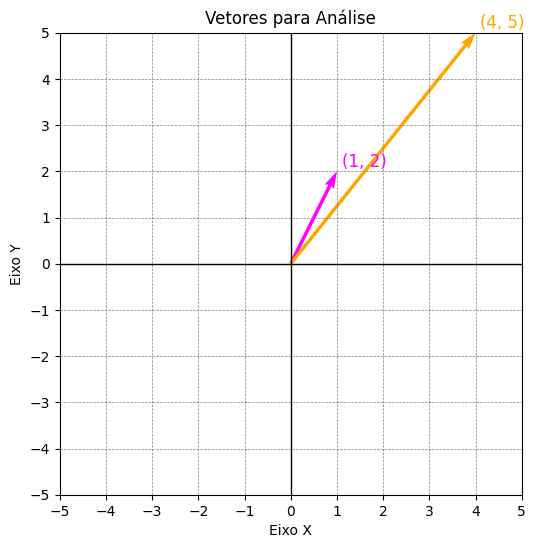

In [22]:
dot_vectors = np.array([v1, v2])
plot_vectors('Vetores para Análise', dot_vectors)

Como o resultado do produto escalar foi diferente de 0, sabe-se que os vetores não são perpendicular entre si. Além disso, o resultado deu um número positivo, o que indica que os vetores apontam para a mesma direção, como pode ser visualizado pelo gráfico. 